In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%load_ext autoreload
%autoreload 2

<music21.pitch.Pitch F4>

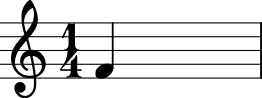

In [86]:
import music21 as m2
a = m2.note.Note('F4')
# dir(a)
a.pitch
a.show()

In [120]:
import sys
sys.path.insert(0, "../")
import guitarHarmony as gt

from itertools import product
import random

In [97]:
note = None
# note = 'F-b4'
note if not note else note.replace('b', '-')
note.replace('b','-') if note is not None else None

('C', <music21.pitch.Pitch C4>, 4)

(None,)

(<music21.duration.Duration 1.0>, 1.0)

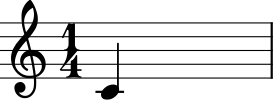

<music21.note.Note C>

In [99]:
a=gt.note.Note()
a.name, a.pitch, a.octave
a.pitch.accidental, 
a.duration, a.duration.quarterLength
a.show()
a.show('midi')
a.note

('F', <music21.pitch.Pitch F5>, 5, None)

(<music21.duration.Duration 1.0>, 1.0)

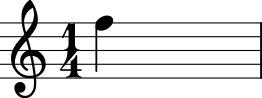

In [100]:
a=gt.note.Note('F5')
a.name, a.pitch, a.octave, a.pitch.accidental, 
a.duration, a.duration.quarterLength
a.show()
a.show('midi')
a

In [185]:
import guitarHarmony as gt
a=gt.note.Note('F4')
a.name, a.pitch, a.octave, a.pitch.accidental, 
a.duration, a.duration.quarterLength
# a.show()
# a.show('midi')
a
b=gt.note.Note('F4')
b
a==b

('F', <music21.pitch.Pitch F4>, 4, None)

(<music21.duration.Duration 1.0>, 1.0)

Note(F4)

Note(F4)

True

In [192]:
# a.note.transpose(3, inPlace=True)
# a.transpose(3)
# a.name
a=gt.note.Note('F4')
# a.addNotation()
# a.show()
# a.removeNotation()
# a.show('notation')
# a.show()
# print(dir(a.note))
# a.note.insertLyric('fd')
# a.note.lyric
# a.show()
a.transpose(3)
a

<music21.note.Note G#>

Note(F4)

<music21.note.Note B>

Note(G#4)

In [ ]:
def getChord(root, chord_type):
    return list(map(str,gt.chord.Chord(root, chord_type).notes))

In [ ]:
getChord('C','maj7')
getChord('B','m')

In [ ]:
a=gt.note.Note('C4')
str(a)

In [ ]:
list(map(str, gt.chord.Chord('A').notes))
list(map(str, gt.chord.Chord('B','dim').notes))

In [ ]:
def getInterval(root='C', interval='P1'):
    return [str(gt.note.Note(root)+gt.interval.Interval(interval))]

In [ ]:
getInterval('D##','P4')